<a href="https://colab.research.google.com/github/gksthdals/NLTK/blob/main/05.%20Categorizing_and_Tagging_Words.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
""" Main Idea """

# What are lexical categories and how are they used in natural language processing?
# What is a good Python data structure for storing words and their categories?
# How can we automatically tag each word of a text with its word class?

## 1. Using a Tagger

In [ ]:
import nltk
from nltk import word_tokenize
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

In [ ]:
""" POS_TAGs

CC: Coordinating conjunction

CD: Cardinal number

DT: Determiner

EX: Existential there

FW: Foreign word

IN: Preposition or subordinating conjunction

JJ: Adjective

VP: Verb Phrase

JJR: Adjective, comparative

JJS: Adjective, superlative

LS: List item marker

MD: Modal

NN: Noun, singular or mass

NNS: Noun, plural

PP: Preposition Phrase

NNP: Proper noun, singular Phrase

NNPS: Proper noun, plural

PDT: Pre determiner

POS: Possessive ending

PRP: Personal pronoun Phrase

PRP: Possessive pronoun Phrase

RB: Adverb

RBR: Adverb, comparative

RBS: Adverb, superlative

RP: Particle

S: Simple declarative clause

SBAR: Clause introduced by a (possibly empty) subordinating conjunction

SBARQ: Direct question introduced by a wh-word or a wh-phrase.

SINV: Inverted declarative sentence, i.e. one in which the subject follows the tensed verb or modal.

SQ: Inverted yes/no question, or main clause of a wh-question, following the wh-phrase in SBARQ.

SYM: Symbol

VBD: Verb, past tense

VBG: Verb, gerund or present participle

VBN: Verb, past participle

VBP: Verb, non-3rd person singular present

VBZ: Verb, 3rd person singular present

WDT: Wh-determiner

WP: Wh-pronoun

WP: Possessive wh-pronoun

WRB: Wh-adverb

"""

In [8]:
text = word_tokenize("And now for something completely different")
nltk.pos_tag(text)

[('And', 'CC'),
 ('now', 'RB'),
 ('for', 'IN'),
 ('something', 'NN'),
 ('completely', 'RB'),
 ('different', 'JJ')]

In [9]:
text = word_tokenize("They refuse to permit us to obtain the refuse permit")
nltk.pos_tag(text)

[('They', 'PRP'),
 ('refuse', 'VBP'),
 ('to', 'TO'),
 ('permit', 'VB'),
 ('us', 'PRP'),
 ('to', 'TO'),
 ('obtain', 'VB'),
 ('the', 'DT'),
 ('refuse', 'NN'),
 ('permit', 'NN')]

In [10]:
nltk.download('brown')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


True

In [11]:
text = nltk.Text(word.lower() for word in nltk.corpus.brown.words())
text.similar('woman')

man time day year car moment world house family child country boy
state job place way war girl work word


In [12]:
text.similar('bought')

made said done put had seen found given left heard was been brought
set got that took in told felt


In [13]:
text.similar('over')

in on to of and for with from at by that into as up out down through
is all about


In [14]:
text.similar('the')

a his this their its her an that our any all one these my in your no
some other and


## 2. Tagged Corpora

### Representing Tagged Tokens

In [15]:
tagged_token = nltk.tag.str2tuple('fly/NN')
tagged_token

('fly', 'NN')

In [16]:
sent = '''
The/AT grand/JJ jury/NN commented/VBD on/IN a/AT number/NN of/IN
other/AP topics/NNS ,/, AMONG/IN them/PPO the/AT Atlanta/NP and/CC
Fulton/NP-tl County/NN-tl purchasing/VBG departments/NNS which/WDT it/PPS
said/VBD ``/`` ARE/BER well/QL operated/VBN and/CC follow/VB generally/RB
accepted/VBN practices/NNS which/WDT inure/VB to/IN the/AT best/JJT
interest/NN of/IN both/ABX governments/NNS ''/'' ./.
'''
[nltk.tag.str2tuple(t) for t in sent.split()]

[('The', 'AT'),
 ('grand', 'JJ'),
 ('jury', 'NN'),
 ('commented', 'VBD'),
 ('on', 'IN'),
 ('a', 'AT'),
 ('number', 'NN'),
 ('of', 'IN'),
 ('other', 'AP'),
 ('topics', 'NNS'),
 (',', ','),
 ('AMONG', 'IN'),
 ('them', 'PPO'),
 ('the', 'AT'),
 ('Atlanta', 'NP'),
 ('and', 'CC'),
 ('Fulton', 'NP-TL'),
 ('County', 'NN-TL'),
 ('purchasing', 'VBG'),
 ('departments', 'NNS'),
 ('which', 'WDT'),
 ('it', 'PPS'),
 ('said', 'VBD'),
 ('``', '``'),
 ('ARE', 'BER'),
 ('well', 'QL'),
 ('operated', 'VBN'),
 ('and', 'CC'),
 ('follow', 'VB'),
 ('generally', 'RB'),
 ('accepted', 'VBN'),
 ('practices', 'NNS'),
 ('which', 'WDT'),
 ('inure', 'VB'),
 ('to', 'IN'),
 ('the', 'AT'),
 ('best', 'JJT'),
 ('interest', 'NN'),
 ('of', 'IN'),
 ('both', 'ABX'),
 ('governments', 'NNS'),
 ("''", "''"),
 ('.', '.')]

### Reading Tagged Corpora

In [17]:
nltk.corpus.brown.tagged_words()

[('The', 'AT'), ('Fulton', 'NP-TL'), ...]

In [23]:
nltk.download('universal_tagset')

[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


True

In [22]:
nltk.corpus.brown.tagged_words(tagset='universal')

[('The', 'DET'), ('Fulton', 'NOUN'), ...]

In [26]:
nltk.download('nps_chat')
nltk.download('conll2000')
nltk.download('treebank')

[nltk_data] Downloading package nps_chat to /root/nltk_data...
[nltk_data]   Package nps_chat is already up-to-date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.


True

In [28]:
nltk.corpus.nps_chat.tagged_words()

[('now', 'RB'), ('im', 'PRP'), ('left', 'VBD'), ...]

In [27]:
nltk.corpus.conll2000.tagged_words()

[('Confidence', 'NN'), ('in', 'IN'), ('the', 'DT'), ...]

In [29]:
nltk.corpus.treebank.tagged_words()

[('Pierre', 'NNP'), ('Vinken', 'NNP'), (',', ','), ...]

In [30]:
nltk.corpus.brown.tagged_words(tagset='universal')

[('The', 'DET'), ('Fulton', 'NOUN'), ...]

In [31]:
nltk.download('sinica_treebank')
nltk.download('indian')
nltk.download('mac_morpho')
nltk.download('cess_cat')

[nltk_data] Downloading package sinica_treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/sinica_treebank.zip.
[nltk_data] Downloading package indian to /root/nltk_data...
[nltk_data]   Unzipping corpora/indian.zip.
[nltk_data] Downloading package mac_morpho to /root/nltk_data...
[nltk_data]   Unzipping corpora/mac_morpho.zip.
[nltk_data] Downloading package cess_cat to /root/nltk_data...
[nltk_data]   Unzipping corpora/cess_cat.zip.


True

In [32]:
nltk.corpus.sinica_treebank.tagged_words()

[('一', 'Neu'), ('友情', 'Nad'), ('嘉珍', 'Nba'), ...]

In [33]:
nltk.corpus.indian.tagged_words()

[('মহিষের', 'NN'), ('সন্তান', 'NN'), (':', 'SYM'), ...]

### A Universal Part-of-Speech Tagset

In [34]:
from nltk.corpus import brown

In [35]:
brown_news_tagged = brown.tagged_words(categories='news', tagset='universal')
tag_fd = nltk.FreqDist(tag for (word, tag) in brown_news_tagged)
tag_fd.most_common()

[('NOUN', 30654),
 ('VERB', 14399),
 ('ADP', 12355),
 ('.', 11928),
 ('DET', 11389),
 ('ADJ', 6706),
 ('ADV', 3349),
 ('CONJ', 2717),
 ('PRON', 2535),
 ('PRT', 2264),
 ('NUM', 2166),
 ('X', 92)]

### Nouns

In [36]:
word_tag_pairs = nltk.bigrams(brown_news_tagged)
noun_preceders = [a[1] for (a, b) in word_tag_pairs if b[1] == 'NOUN']
fdist = nltk.FreqDist(noun_preceders)
[tag for (tag, _) in fdist.most_common()]

['NOUN',
 'DET',
 'ADJ',
 'ADP',
 '.',
 'VERB',
 'CONJ',
 'NUM',
 'ADV',
 'PRT',
 'PRON',
 'X']

### Verbs

In [ ]:
wsj = nltk.corpus.treebank.tagged_words(tagset='universal')
word_tag_fd = nltk.FreqDist(wsj)
[wt[0] for (wt, _) in word_tag_fd.most_common() if wt[1] == 'VERB']

In [58]:
cfd1 = nltk.ConditionalFreqDist(wsj)
cfd1['yield'].most_common()

[('VERB', 28), ('NOUN', 20)]

In [39]:
cfd1['cut'].most_common()

[('VERB', 25), ('NOUN', 3)]

In [40]:
wsj = nltk.corpus.treebank.tagged_words()
cfd2 = nltk.ConditionalFreqDist((tag, word) for (word, tag) in wsj)
list(cfd2['VBN'])

['named',
 'used',
 'caused',
 'exposed',
 'reported',
 'replaced',
 'sold',
 'died',
 'expected',
 'diagnosed',
 'studied',
 'industrialized',
 'owned',
 'found',
 'classified',
 'rejected',
 'outlawed',
 'imported',
 'tracked',
 'thought',
 'considered',
 'elected',
 'based',
 'lifted',
 'ensnarled',
 'voted',
 'been',
 'held',
 'banned',
 'renovated',
 'prolonged',
 'recorded',
 'accumulated',
 'offered',
 'become',
 'guaranteed',
 'proposed',
 'related',
 'improved',
 'worried',
 'cluttered',
 'expedited',
 'retired',
 'ordered',
 'collected',
 'required',
 'received',
 'moved',
 'determined',
 'made',
 'changed',
 'completed',
 'disputed',
 'refunded',
 'estimated',
 'compared',
 'located',
 'filed',
 'scrapped',
 'anticipated',
 'priced',
 'set',
 'applied',
 'existed',
 'incurred',
 'reached',
 'Regarded',
 'paid',
 'trained',
 'instituted',
 'vowed',
 'deemed',
 'combined',
 'removed',
 'concerned',
 'complained',
 'accelerated',
 'believed',
 'called',
 'solved',
 'forgiven',


### Adjectives and Adverbs

### Unsimplified Tags

In [61]:
def findtags(tag_prefix, tagged_text):
  cfd = nltk.ConditionalFreqDist((tag, word) for (word, tag) in tagged_text
                                 if tag.startswith(tag_prefix))
  return dict((tag, cfd[tag].most_common(5)) for tag in cfd.conditions())

In [62]:
tagdict = findtags('NN', nltk.corpus.brown.tagged_words(categories='news'))
for tag in sorted(tagdict):
  print("%9s" % tag, tagdict[tag])

       NN [('year', 137), ('time', 97), ('state', 88), ('week', 85), ('man', 72)]
      NN$ [("year's", 13), ("world's", 8), ("state's", 7), ("nation's", 6), ("city's", 6)]
   NN$-HL [("Golf's", 1), ("Navy's", 1)]
   NN$-TL [("President's", 11), ("Administration's", 3), ("Army's", 3), ("League's", 3), ("University's", 3)]
    NN-HL [('sp.', 2), ('problem', 2), ('Question', 2), ('cut', 2), ('party', 2)]
    NN-NC [('ova', 1), ('eva', 1), ('aya', 1)]
    NN-TL [('President', 88), ('House', 68), ('State', 59), ('University', 42), ('City', 41)]
 NN-TL-HL [('Fort', 2), ('Mayor', 1), ('Commissioner', 1), ('City', 1), ('Oak', 1)]
      NNS [('years', 101), ('members', 69), ('people', 52), ('sales', 51), ('men', 46)]
     NNS$ [("children's", 7), ("women's", 5), ("men's", 3), ("janitors'", 3), ("taxpayers'", 2)]
  NNS$-HL [("Dealers'", 1), ("Idols'", 1)]
  NNS$-TL [("Women's", 4), ("States'", 3), ("Giants'", 2), ("Princes'", 1), ("Bombers'", 1)]
   NNS-HL [('Wards', 1), ('deputies', 1), ('bond

### Exploring Tagged Corpora

In [63]:
brown_learned_text = brown.words(categories='learned')
sorted(set(b for (a, b) in nltk.bigrams(brown_learned_text) if a == 'often'))

[',',
 '.',
 'accomplished',
 'analytically',
 'appear',
 'apt',
 'associated',
 'assuming',
 'became',
 'become',
 'been',
 'began',
 'call',
 'called',
 'carefully',
 'chose',
 'classified',
 'colorful',
 'composed',
 'contain',
 'differed',
 'difficult',
 'encountered',
 'enough',
 'equate',
 'extremely',
 'found',
 'happens',
 'have',
 'ignored',
 'in',
 'involved',
 'more',
 'needed',
 'nightly',
 'observed',
 'of',
 'on',
 'out',
 'quite',
 'represent',
 'responsible',
 'revamped',
 'seclude',
 'set',
 'shortened',
 'sing',
 'sounded',
 'stated',
 'still',
 'sung',
 'supported',
 'than',
 'to',
 'when',
 'work']

In [64]:
brown_lrnd_tagged = brown.tagged_words(categories='learned', tagset='universal')
tags = [b[1] for (a, b) in nltk.bigrams(brown_lrnd_tagged) if a[0] == 'often']
fd = nltk.FreqDist(tags)
fd.tabulate()

VERB  ADV  ADP  ADJ    .  PRT 
  37    8    7    6    4    2 


In [65]:
from nltk.corpus import brown

In [66]:
def process(sentence):
  for (w1, t1), (w2, t2), (w3, t3) in nltk.trigrams(sentence):
    if (t1.startswith('V') and t2 == 'TO' and t3.startswith('V')):
      print(w1, w2, w3)

In [ ]:
for tagged_sent in brown.tagged_sents():
  process(tagged_sent)

In [68]:
brown_news_tagged = brown.tagged_words(categories='news', tagset='universal')
data = nltk.ConditionalFreqDist((word.lower(), tag)
                                for (word, tag) in brown_news_tagged)
for word in sorted(data.conditions()):
  if len(data[word]) > 3:
    tags = [tag for (tag, _) in data[word].most_common()]
    print(word, ' '.join(tags))

best ADJ ADV VERB NOUN
close ADV ADJ VERB NOUN
open ADJ VERB NOUN ADV
present ADJ ADV NOUN VERB
that ADP DET PRON ADV


## 3. Mapping Words to Properties Using Python Dictionaries

### Indexing Lists vs Dictionaries

### Dictionaries in Python

In [69]:
pos = {}
pos

{}

In [70]:
pos['colorless'] = 'ADJ'
pos

{'colorless': 'ADJ'}

In [71]:
pos['ideas'] = 'N'
pos['sleep'] = 'V'
pos['furiously'] = 'ADV'
pos

{'colorless': 'ADJ', 'furiously': 'ADV', 'ideas': 'N', 'sleep': 'V'}

In [72]:
for word in sorted(pos):
  print(word + ":", pos[word])

colorless: ADJ
furiously: ADV
ideas: N
sleep: V


In [73]:
for key, val in sorted(pos.items()):
  print(key + ":", val)

colorless: ADJ
furiously: ADV
ideas: N
sleep: V


In [74]:
pos['sleep'].append('N')

AttributeError: ignored

### Defining Dictionaries

In [76]:
pos = {'colorless': 'ADJ', 'ideas': 'N', 'sleep': 'V', 'furiously': 'ADV'}
pos = dict(colorless='ADJ', ideas='N', sleep='V', furiously='ADV')

### Default Dictionaries

In [77]:
from collections import defaultdict
frequency = defaultdict(int)
frequency['colorless'] = 4
frequency['ideas']

0

In [78]:
pos = defaultdict(list)
pos['sleep'] = ['NOUN', 'VERB']
pos['ideas']

[]

In [79]:
pos = defaultdict(lambda: 'NOUN')
pos['colorless'] = 'ADJ'
pos['blog']

'NOUN'

In [80]:
list(pos.items())

[('colorless', 'ADJ'), ('blog', 'NOUN')]

In [81]:
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


True

In [83]:
alice = nltk.corpus.gutenberg.words('carroll-alice.txt')
vocab = nltk.FreqDist(alice)
v1000 = [word for (word, _) in vocab.most_common(1000)]
mapping = defaultdict(lambda: 'UNK')
for v in v1000:
  mapping[v] = v

alice2 = [mapping[v] for v in alice]
alice2[:100]

['[',
 'Alice',
 "'",
 's',
 'Adventures',
 'in',
 'Wonderland',
 'by',
 'UNK',
 'UNK',
 'UNK',
 'UNK',
 'CHAPTER',
 'I',
 '.',
 'Down',
 'the',
 'Rabbit',
 '-',
 'UNK',
 'Alice',
 'was',
 'beginning',
 'to',
 'get',
 'very',
 'tired',
 'of',
 'sitting',
 'by',
 'her',
 'sister',
 'on',
 'the',
 'bank',
 ',',
 'and',
 'of',
 'having',
 'nothing',
 'to',
 'do',
 ':',
 'once',
 'or',
 'twice',
 'she',
 'had',
 'peeped',
 'into',
 'the',
 'book',
 'her',
 'sister',
 'was',
 'reading',
 ',',
 'but',
 'it',
 'had',
 'no',
 'pictures',
 'or',
 'UNK',
 'in',
 'it',
 ',',
 "'",
 'and',
 'what',
 'is',
 'the',
 'use',
 'of',
 'a',
 'book',
 ",'",
 'thought',
 'Alice',
 "'",
 'without',
 'pictures',
 'or',
 'conversation',
 "?'",
 'So',
 'she',
 'was',
 'considering',
 'in',
 'her',
 'own',
 'mind',
 '(',
 'as',
 'well',
 'as',
 'she',
 'could',
 ',']

### Incrementally Updating a Dictionary

In [84]:
from collections import defaultdict
from nltk.corpus import brown

counts = defaultdict(int)
for (word, tag) in brown.tagged_words(categories='news', tagset='universal'):
  counts[tag] += 1

In [85]:
counts['NOUN']

30654

In [86]:
sorted(counts)

['.',
 'ADJ',
 'ADP',
 'ADV',
 'CONJ',
 'DET',
 'NOUN',
 'NUM',
 'PRON',
 'PRT',
 'VERB',
 'X']

In [87]:
from operator import itemgetter

sorted(counts.items(), key=itemgetter(1), reverse=True)

[('NOUN', 30654),
 ('VERB', 14399),
 ('ADP', 12355),
 ('.', 11928),
 ('DET', 11389),
 ('ADJ', 6706),
 ('ADV', 3349),
 ('CONJ', 2717),
 ('PRON', 2535),
 ('PRT', 2264),
 ('NUM', 2166),
 ('X', 92)]

In [88]:
[t for t, c in sorted(counts.items(), key=itemgetter(1), reverse=True)]

['NOUN',
 'VERB',
 'ADP',
 '.',
 'DET',
 'ADJ',
 'ADV',
 'CONJ',
 'PRON',
 'PRT',
 'NUM',
 'X']

In [89]:
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [90]:
last_letters = defaultdict(list)
words = nltk.corpus.words.words('en')
for word in words:
  key = word[-2:]
  last_letters[key].append(word)

In [93]:
last_letters['ly'][:10]

['abactinally',
 'abandonedly',
 'abasedly',
 'abashedly',
 'abashlessly',
 'abbreviately',
 'abdominally',
 'abhorrently',
 'abidingly',
 'abiogenetically']

In [94]:
last_letters['zy'][:10]

['blazy',
 'bleezy',
 'blowzy',
 'boozy',
 'breezy',
 'bronzy',
 'buzzy',
 'Chazy',
 'cozy',
 'crazy']

In [95]:
anagrams = defaultdict(list)
for word in words:
  key = ''.join(sorted(word))
  anagrams[key].append(word)

In [96]:
anagrams['aeilnrt']

['entrail', 'latrine', 'ratline', 'reliant', 'retinal', 'trenail']

In [97]:
anagrams = nltk.Index((''.join(sorted(w)), w) for w in words)
anagrams['aeilnrt']

['entrail', 'latrine', 'ratline', 'reliant', 'retinal', 'trenail']

### Complex Keys and Values

In [98]:
pos = defaultdict(lambda: defaultdict(int))
brown_news_tagged = brown.tagged_words(categories='news', tagset='universal')
for ((w1, t1), (w2, t2)) in nltk.bigrams(brown_news_tagged):
  pos[(t1, w2)][t2] += 1

pos[('DET', 'right')]

defaultdict(int, {'ADJ': 11, 'NOUN': 5})

### Inverting a Dictionary

In [99]:
counts = defaultdict(int)
for word in nltk.corpus.gutenberg.words('milton-paradise.txt'):
  counts[word] += 1

[key for (key, value) in counts.items() if value == 32]

['mortal',
 'Against',
 'Him',
 'There',
 'brought',
 'King',
 'virtue',
 'every',
 'been',
 'thine']

In [100]:
pos = {'colorless': 'ADJ', 'ideas': 'N', 'sleep': 'V', 'furiously': 'ADV'}
pos2 = dict((value, key) for (key, value) in pos.items())
pos2['N']

'ideas'

In [101]:
pos.update({'cats': 'N', 'scratch': 'V', 'peacefully': 'ADV', 'old': 'ADJ'})
pos2 = defaultdict(list)
for key, value in pos.items():
  pos2[value].append(key)

In [102]:
pos2['ADV']

['furiously', 'peacefully']

In [103]:
pos2 = nltk.Index((value, key) for (key, value) in pos.items())
pos2['ADV']

['furiously', 'peacefully']

## 4. Automatic Tagging

In [104]:
from nltk.corpus import brown
brown_tagged_sents = brown.tagged_sents(categories='news')
brown_sents = brown.sents(categories='news')

### The Default Tagger

In [105]:
tags = [tag for (word, tag) in brown.tagged_words(categories='news')]
nltk.FreqDist(tags).max()

'NN'

In [106]:
raw = 'I do not like green eggs and ham, I do not like them Sam I am!'
tokens = nltk.word_tokenize(raw)
default_tagger = nltk.DefaultTagger('NN')
default_tagger.tag(tokens)

[('I', 'NN'),
 ('do', 'NN'),
 ('not', 'NN'),
 ('like', 'NN'),
 ('green', 'NN'),
 ('eggs', 'NN'),
 ('and', 'NN'),
 ('ham', 'NN'),
 (',', 'NN'),
 ('I', 'NN'),
 ('do', 'NN'),
 ('not', 'NN'),
 ('like', 'NN'),
 ('them', 'NN'),
 ('Sam', 'NN'),
 ('I', 'NN'),
 ('am', 'NN'),
 ('!', 'NN')]

In [107]:
default_tagger.evaluate(brown_tagged_sents)

0.13089484257215028

### The Regular Expression Tagger

In [108]:
patterns = [
            (r'.*ing$', 'VBG'),
            (r'.*ed$', 'VBD'),
            (r'.*es$', 'VBZ'),
            (r'.*ould$', 'MD'),
            (r'.*\'s$', 'NN$'),
            (r'.*s$', 'NNS'),
            (r'^-?[0-9]+(\.[0-9]+)?$', 'CD'),
            (r'.*', 'NN')
]

In [109]:
regexp_tagger = nltk.RegexpTagger(patterns)
regexp_tagger.tag(brown_sents[3])

[('``', 'NN'),
 ('Only', 'NN'),
 ('a', 'NN'),
 ('relative', 'NN'),
 ('handful', 'NN'),
 ('of', 'NN'),
 ('such', 'NN'),
 ('reports', 'NNS'),
 ('was', 'NNS'),
 ('received', 'VBD'),
 ("''", 'NN'),
 (',', 'NN'),
 ('the', 'NN'),
 ('jury', 'NN'),
 ('said', 'NN'),
 (',', 'NN'),
 ('``', 'NN'),
 ('considering', 'VBG'),
 ('the', 'NN'),
 ('widespread', 'NN'),
 ('interest', 'NN'),
 ('in', 'NN'),
 ('the', 'NN'),
 ('election', 'NN'),
 (',', 'NN'),
 ('the', 'NN'),
 ('number', 'NN'),
 ('of', 'NN'),
 ('voters', 'NNS'),
 ('and', 'NN'),
 ('the', 'NN'),
 ('size', 'NN'),
 ('of', 'NN'),
 ('this', 'NNS'),
 ('city', 'NN'),
 ("''", 'NN'),
 ('.', 'NN')]

In [110]:
regexp_tagger.evaluate(brown_tagged_sents)

0.20186168625812995

### The Lookup Tagger

In [111]:
fd = nltk.FreqDist(brown.words(categories='news'))
cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories='news'))
most_freq_words = fd.most_common(100)
likely_tags = dict((word, cfd[word].max()) for (word, _) in most_freq_words)
baseline_tagger = nltk.UnigramTagger(model=likely_tags)
baseline_tagger.evaluate(brown_tagged_sents)

0.45578495136941344

In [112]:
sent = brown.sents(categories='news')[3]
baseline_tagger.tag(sent)

[('``', '``'),
 ('Only', None),
 ('a', 'AT'),
 ('relative', None),
 ('handful', None),
 ('of', 'IN'),
 ('such', None),
 ('reports', None),
 ('was', 'BEDZ'),
 ('received', None),
 ("''", "''"),
 (',', ','),
 ('the', 'AT'),
 ('jury', None),
 ('said', 'VBD'),
 (',', ','),
 ('``', '``'),
 ('considering', None),
 ('the', 'AT'),
 ('widespread', None),
 ('interest', None),
 ('in', 'IN'),
 ('the', 'AT'),
 ('election', None),
 (',', ','),
 ('the', 'AT'),
 ('number', None),
 ('of', 'IN'),
 ('voters', None),
 ('and', 'CC'),
 ('the', 'AT'),
 ('size', None),
 ('of', 'IN'),
 ('this', 'DT'),
 ('city', None),
 ("''", "''"),
 ('.', '.')]

In [113]:
baseline_tagger = nltk.UnigramTagger(model=likely_tags, backoff=nltk.DefaultTagger('NN'))

In [114]:
def performance(cfd, wordlist):
    lt = dict((word, cfd[word].max()) for word in wordlist)
    baseline_tagger = nltk.UnigramTagger(model=lt, backoff=nltk.DefaultTagger('NN'))
    return baseline_tagger.evaluate(brown.tagged_sents(categories='news'))

def display():
    import pylab
    word_freqs = nltk.FreqDist(brown.words(categories='news')).most_common()
    words_by_freq = [w for (w, _) in word_freqs]
    cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories='news'))
    sizes = 2 ** pylab.arange(15)
    perfs = [performance(cfd, words_by_freq[:size]) for size in sizes]
    pylab.plot(sizes, perfs, '-bo')
    pylab.title('Lookup Tagger Performance with Varying Model Size')
    pylab.xlabel('Model Size')
    pylab.ylabel('Performance')
    pylab.show()

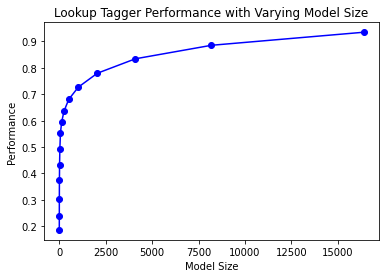

In [115]:
display()

### Evaluation

## 5. N-Gram Tagging

### Unigram Tagging

In [117]:
from nltk.corpus import brown
brown_tagged_sents = brown.tagged_sents(categories='news')
brown_sents = brown.sents(categories='news')
unigram_tagger = nltk.UnigramTagger(brown_tagged_sents)
unigram_tagger.tag(brown_sents[2007])

[('Various', 'JJ'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('apartments', 'NNS'),
 ('are', 'BER'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('terrace', 'NN'),
 ('type', 'NN'),
 (',', ','),
 ('being', 'BEG'),
 ('on', 'IN'),
 ('the', 'AT'),
 ('ground', 'NN'),
 ('floor', 'NN'),
 ('so', 'QL'),
 ('that', 'CS'),
 ('entrance', 'NN'),
 ('is', 'BEZ'),
 ('direct', 'JJ'),
 ('.', '.')]

In [118]:
unigram_tagger.evaluate(brown_tagged_sents)

0.9349006503968017

### Separating the Training and Testing Data

In [119]:
size = int(len(brown_tagged_sents) * 0.9)
size

4160

In [120]:
train_sents = brown_tagged_sents[:size]
test_sents = brown_tagged_sents[size:]
unigram_tagger = nltk.UnigramTagger(train_sents)
unigram_tagger.evaluate(test_sents)

0.8121200039868434

### General N-Gram Tagging

In [121]:
bigram_tagger = nltk.BigramTagger(train_sents)
bigram_tagger.tag(brown_sents[2007])

[('Various', 'JJ'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('apartments', 'NNS'),
 ('are', 'BER'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('terrace', 'NN'),
 ('type', 'NN'),
 (',', ','),
 ('being', 'BEG'),
 ('on', 'IN'),
 ('the', 'AT'),
 ('ground', 'NN'),
 ('floor', 'NN'),
 ('so', 'CS'),
 ('that', 'CS'),
 ('entrance', 'NN'),
 ('is', 'BEZ'),
 ('direct', 'JJ'),
 ('.', '.')]

In [122]:
unseen_sent = brown_sents[4203]
bigram_tagger.tag(unseen_sent)

[('The', 'AT'),
 ('population', 'NN'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('Congo', 'NP'),
 ('is', 'BEZ'),
 ('13.5', None),
 ('million', None),
 (',', None),
 ('divided', None),
 ('into', None),
 ('at', None),
 ('least', None),
 ('seven', None),
 ('major', None),
 ('``', None),
 ('culture', None),
 ('clusters', None),
 ("''", None),
 ('and', None),
 ('innumerable', None),
 ('tribes', None),
 ('speaking', None),
 ('400', None),
 ('separate', None),
 ('dialects', None),
 ('.', None)]

In [123]:
bigram_tagger.evaluate(test_sents)

0.10206319146815508

### Combining Taggers

In [124]:
t0 = nltk.DefaultTagger('NN')
t1 = nltk.UnigramTagger(train_sents, backoff=t0)
t2 = nltk.BigramTagger(train_sents, backoff=t1)
t2.evaluate(test_sents)

0.8452108043456593

In [ ]:
# UnigramTagger  : 0.8121200039868434
# CombinedTagger : 0.8452108043456593

### Tagging Unknown Words

In [ ]:
# out-of-vocabulary에 대해서는 UNK으로 판단해서 n-gram tagger를 이용(context)

### Storing Taggers

In [125]:
from pickle import dump
output = open('t2.pkl', 'wb')
dump(t2, output, -1)
output.close()

In [126]:
from pickle import load
input = open('t2.pkl', 'rb')
tagger = load(input)
input.close()

In [127]:
text = """The board's action shows what free enterprise is up against in our complex maze of regulatory laws ."""
tokens = text.split()
tagger.tag(tokens)

[('The', 'AT'),
 ("board's", 'NN$'),
 ('action', 'NN'),
 ('shows', 'NNS'),
 ('what', 'WDT'),
 ('free', 'JJ'),
 ('enterprise', 'NN'),
 ('is', 'BEZ'),
 ('up', 'RP'),
 ('against', 'IN'),
 ('in', 'IN'),
 ('our', 'PP$'),
 ('complex', 'JJ'),
 ('maze', 'NN'),
 ('of', 'IN'),
 ('regulatory', 'NN'),
 ('laws', 'NNS'),
 ('.', '.')]

### Performance Limitations

In [133]:
cfd = nltk.ConditionalFreqDist(
    ((x[1], y[1], z[0]), z[1])
    for sent in brown_tagged_sents
    for x, y, z in nltk.trigrams(sent))

ambiguous_contexts = [c for c in cfd.conditions() if len(cfd[c]) > 1]
sum(cfd[c].N() for c in ambiguous_contexts) / cfd.N()

RuntimeError: ignored

In [134]:
test_tags = [tag for sent in brown.sents(categories='editorial')
                 for (word, tag) in t2.tag(sent)]
gold_tags = [tag for (word, tag) in brown.tagged_words(categories='editorial')]
print(nltk.ConfusionMatrix(gold_tags, test_tags))

           |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

## 6. Transformation-Based Tagging

In [135]:
from nltk.tbl import demo as brill_demo
brill_demo.demo()

Loading tagged data from treebank... 
Read testing data (200 sents/5251 wds)
Read training data (800 sents/19933 wds)
Read baseline data (800 sents/19933 wds) [reused the training set]
Trained baseline tagger
    Accuracy on test set: 0.8366
Training tbl tagger...
TBL train (fast) (seqs: 800; tokens: 19933; tpls: 24; min score: 3; min acc: None)
Finding initial useful rules...
    Found 12799 useful rules.

           B      |
   S   F   r   O  |        Score = Fixed - Broken
   c   i   o   t  |  R     Fixed = num tags changed incorrect -> correct
   o   x   k   h  |  u     Broken = num tags changed correct -> incorrect
   r   e   e   e  |  l     Other = num tags changed incorrect -> incorrect
   e   d   n   r  |  e
------------------+-------------------------------------------------------
  23  23   0   0  | POS->VBZ if Pos:PRP@[-2,-1]
  18  19   1   0  | NN->VB if Pos:-NONE-@[-2] & Pos:TO@[-1]
  14  14   0   0  | VBP->VB if Pos:MD@[-2,-1]
  12  12   0   0  | VBP->VB if Pos:TO@[-1]
  

## 7. How to Determine the Category of a Word

### Morphological Clues (형태학)

In [ ]:
# -ness : adjective -> noun
# -ment : verb -> noun
# -ing : present participle or gerund

### Syntactic Clues (통어론)

In [ ]:
# 앞뒤 단어의 품사에 따라서

# the near window
# The end is (very) near.

### Semantic Clues (의미론)

### New Words

In [ ]:
# open class : 앞으로도 계속 추가될 수 있는 (ex. NOUN)
# close class : 이미 정해진 단어들 (ex. PREPOSITION)

### Morphology in Part of Speech Tagsets